# Importing the Libraries

In [132]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

# 1. Load All Images from a Folder

In [133]:
def load_images_from_folder(folder_path):
    images = []
    for filename in os.listdir(folder_path):
        file_path = os.path.join(folder_path, filename)
        image = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
        if image is not None:
            images.append((filename, image))
    return images

# 2. Add Gaussian Noise

In [134]:
def add_gaussian_noise(image, mean=0, stddev=25):
    noise = np.random.normal(mean, stddev, image.shape).astype(np.uint8)
    noisy_image = cv2.add(image, noise)
    return noisy_image

**Why do we prefer Mean to be equal to 0?**
<br>
A mean of 0 ensures the noise is evenly distributed around the original pixel values. This means you're adding variations (both positive and negative) without systematically brightening or darkening the image.
<br>
Noise in images (like from camera sensors) tends to be random and centered around zero. This avoids introducing a bias to the image.

# 3. Add Salt-and-Pepper Noise

In [135]:
def add_salt_and_pepper_noise(image, amount=0.02):
    noisy_image = np.copy(image)
    num_salt = int(amount * image.size * 0.5)
    num_pepper = int(amount * image.size * 0.5)

    # Salt noise
    coords_salt = [np.random.randint(0, i - 1, num_salt) for i in image.shape]
    noisy_image[tuple(coords_salt)] = 255

    # Pepper noise
    coords_pepper = [np.random.randint(0, i - 1, num_pepper) for i in image.shape]
    noisy_image[tuple(coords_pepper)] = 0

    return noisy_image



# 4. Gaussian Filter

In [136]:
def apply_gaussian_filter(image, kernel_size=5, sigma=1):
    return cv2.GaussianBlur(image, (kernel_size, kernel_size), sigma)

A higher sigma creates a wider Gaussian curve, causing more smoothing (pixels farther away have a stronger influence).

# 5. Averaging Filter

In [137]:
def apply_averaging_filter(image, kernel_size=5):
    kernel = np.ones((kernel_size, kernel_size), np.float32) / (kernel_size * kernel_size)
    return cv2.filter2D(image, -1, kernel)


# 6. Median Filter

In [138]:
def apply_median_filter(image, kernel_size=5):
    return cv2.medianBlur(image, kernel_size)



# 7. Bilateral Filter

In [139]:
def apply_bilateral_filter(image, diameter=9, sigma_color=75, sigma_space=75):
    return cv2.bilateralFilter(image, diameter, sigma_color, sigma_space)



# 8. Process the Filtered Images

Processing: barbara.tif


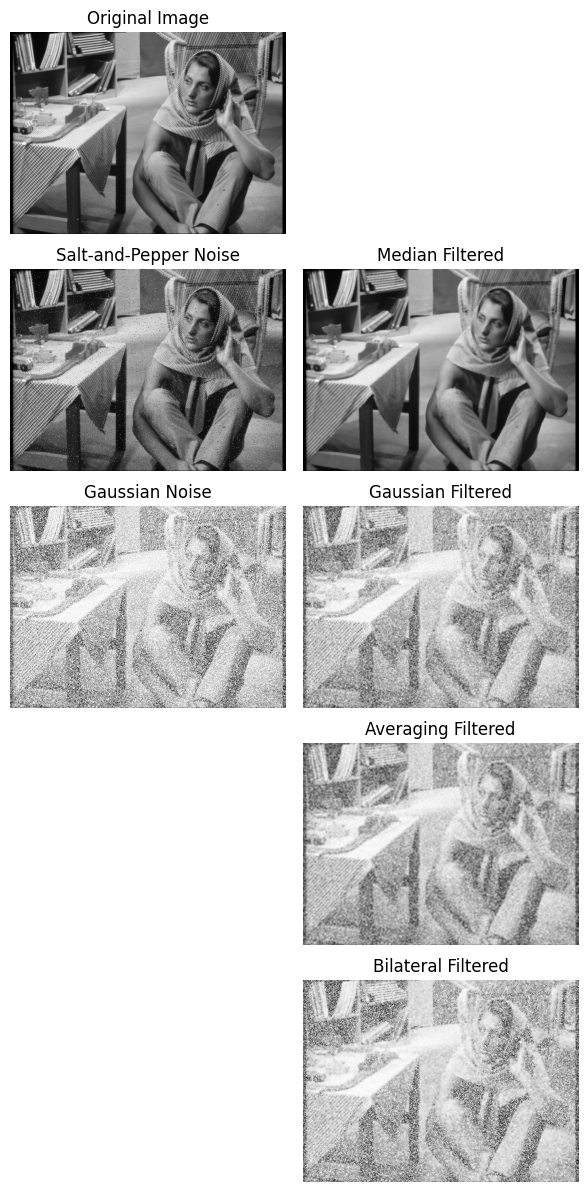

Processing: boat.jpeg


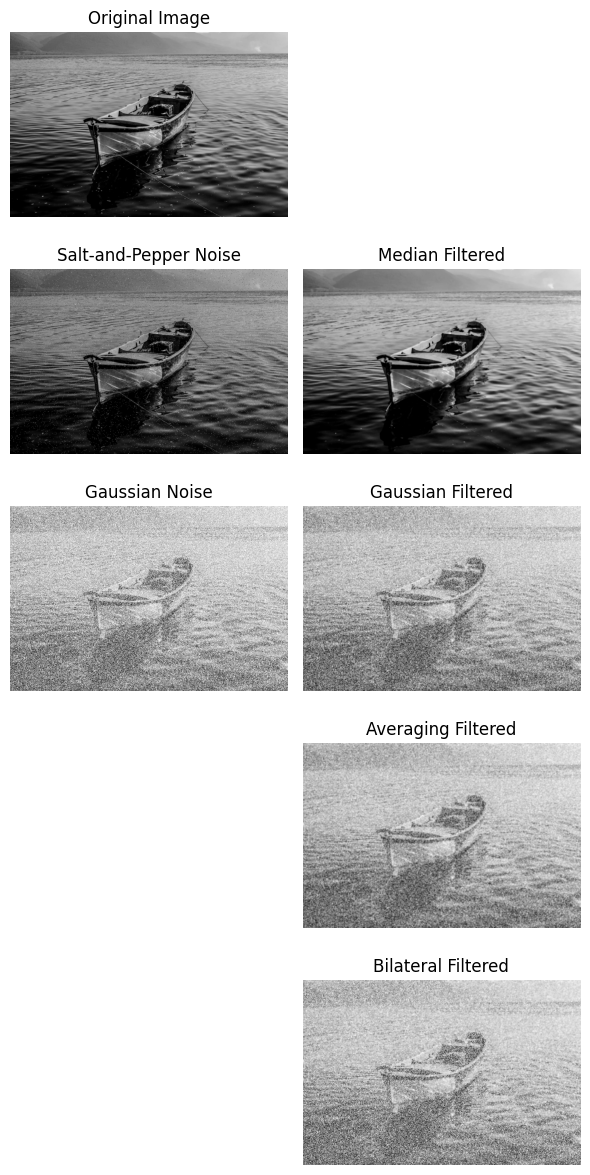

Processing: cameraman.tif


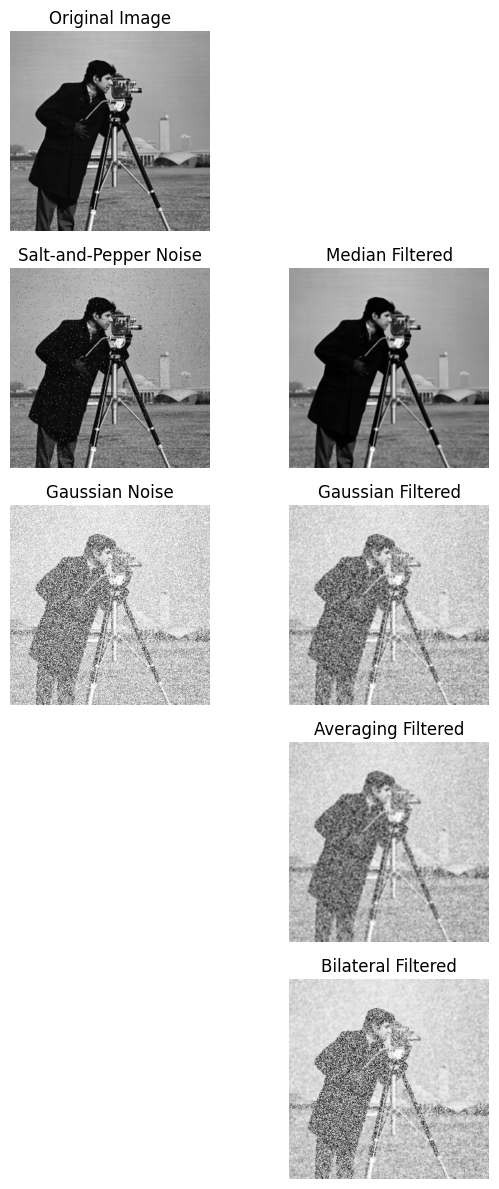

Processing: house.tif


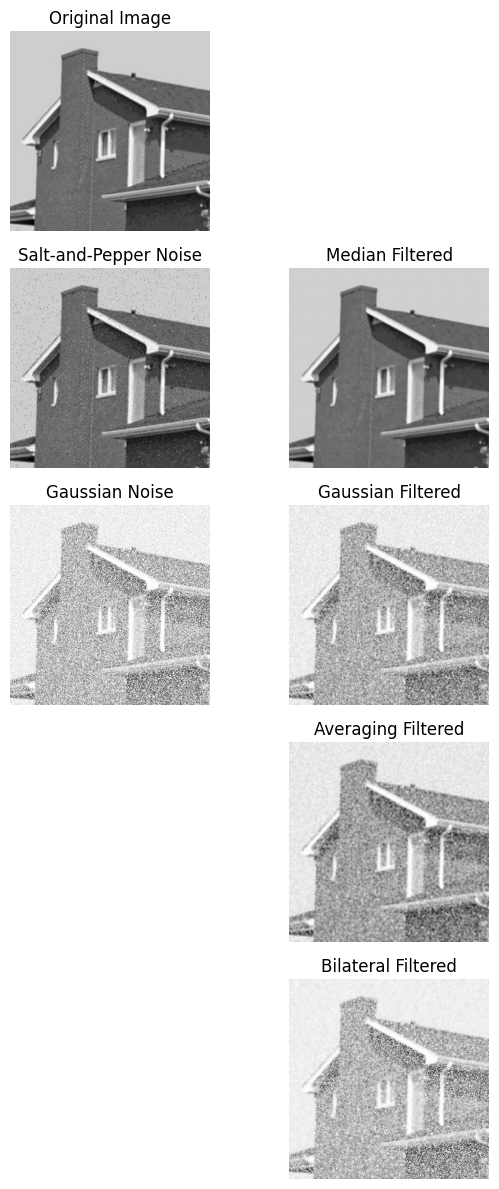

Processing: jetplane.tif


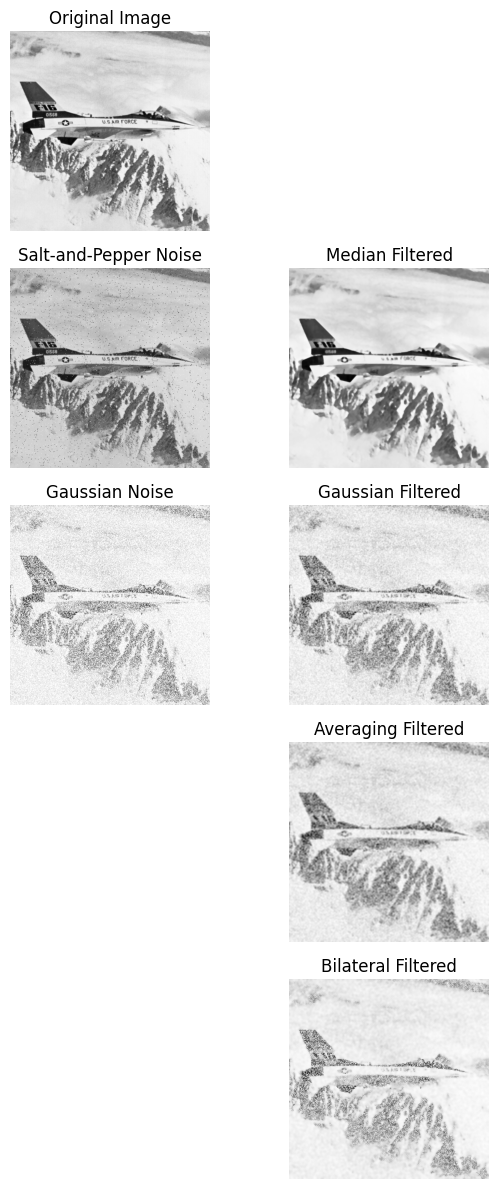

Processing: lake.tif


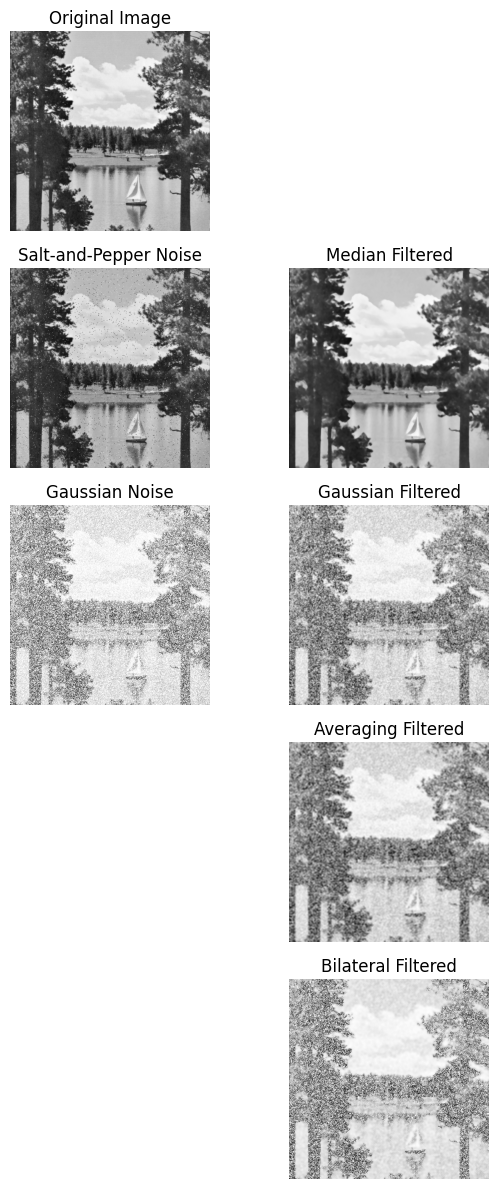

Processing: lena_color_512.tif


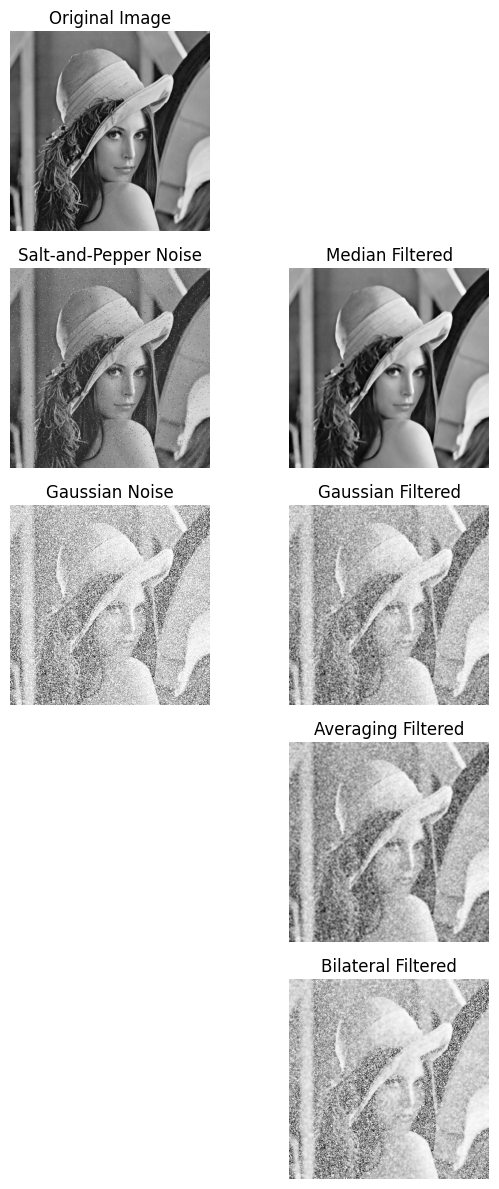

Processing: lena_gray_512.tif


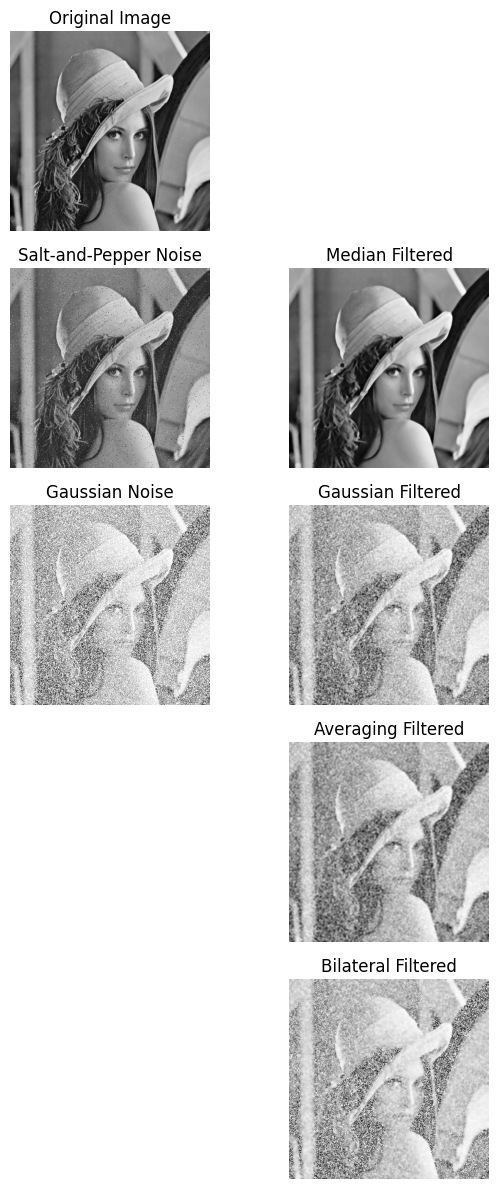

Processing: livingroom.tif


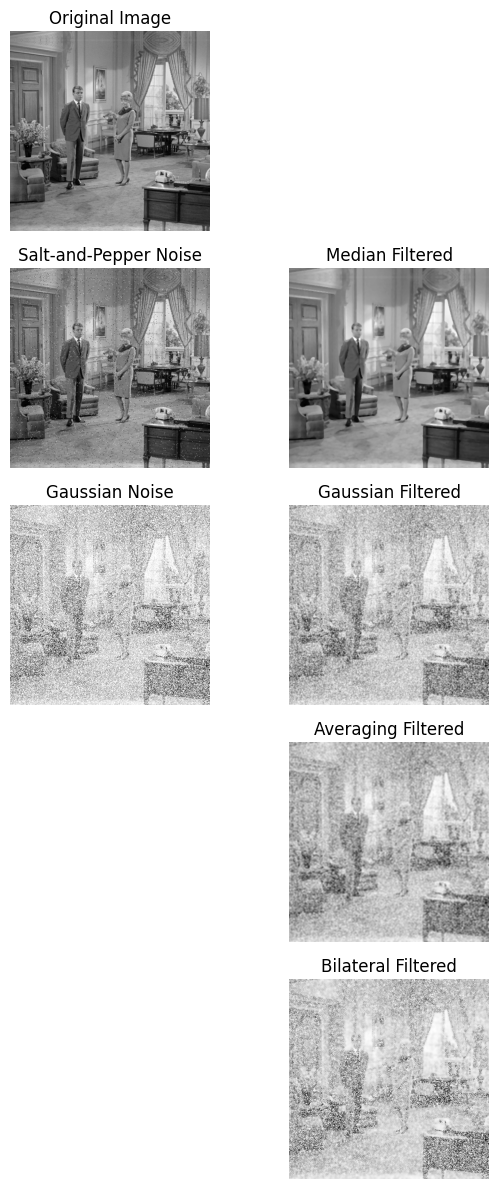

Processing: mandril_color.tif


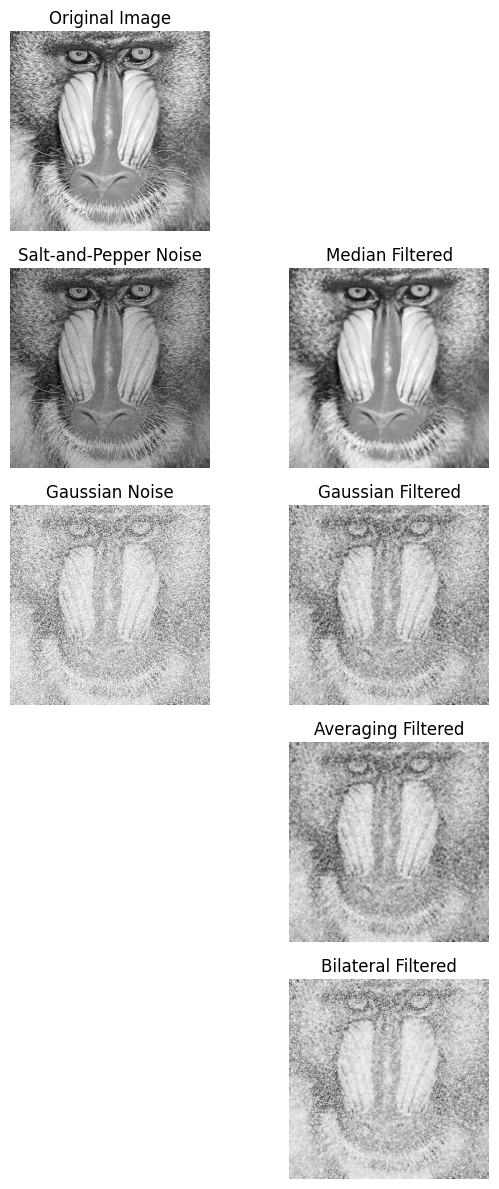

Processing: mandril_gray.tif


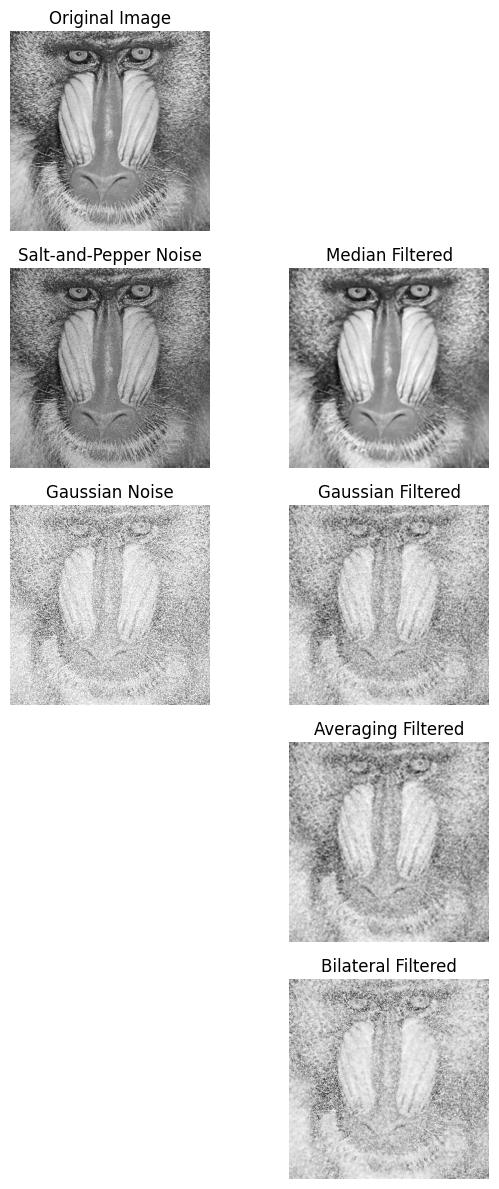

Processing: peppers_color.tif


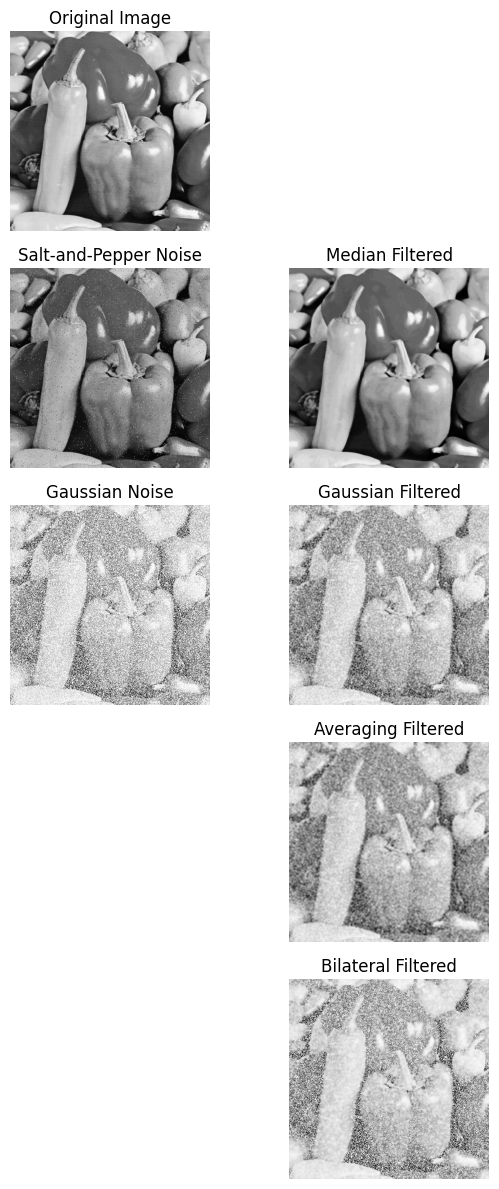

Processing: peppers_gray.tif


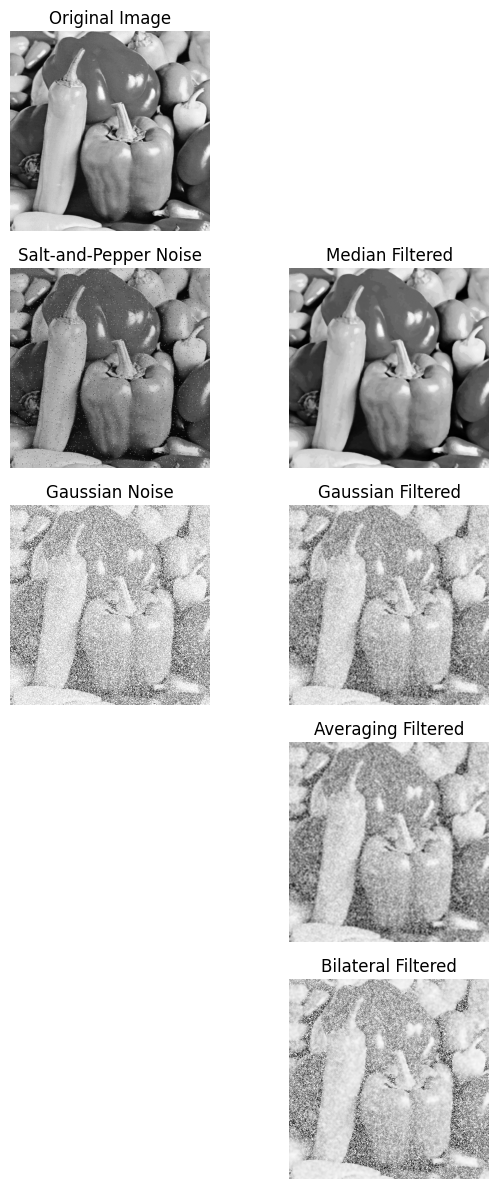

Processing: pirate.tif


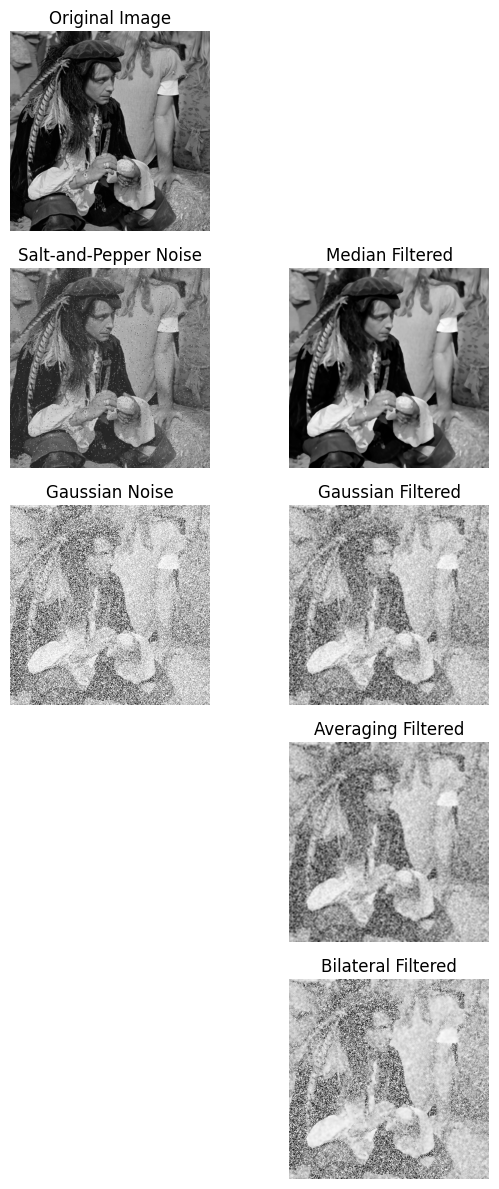

Processing: walkbridge.tif


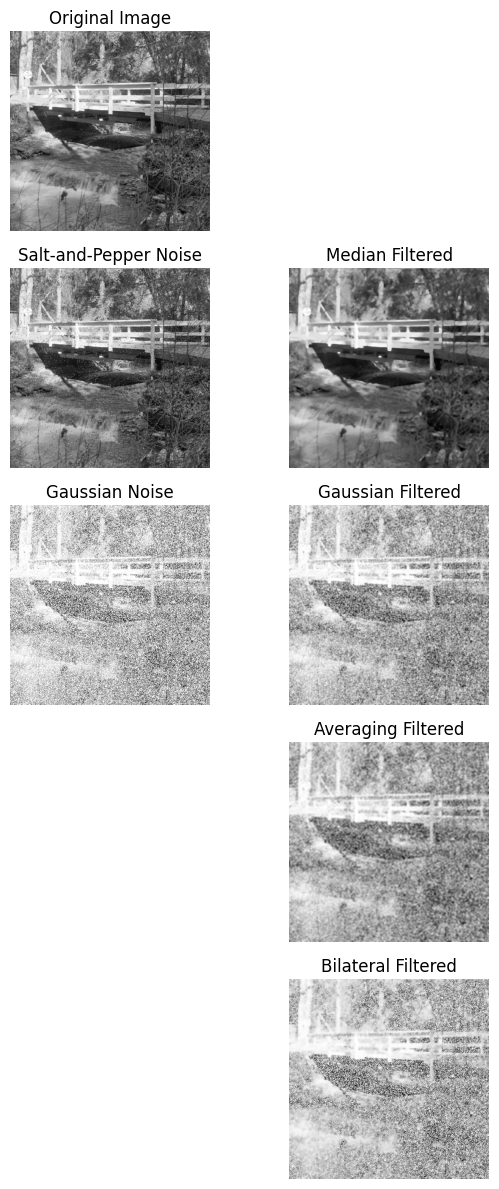

Processing: woman_blonde.tif


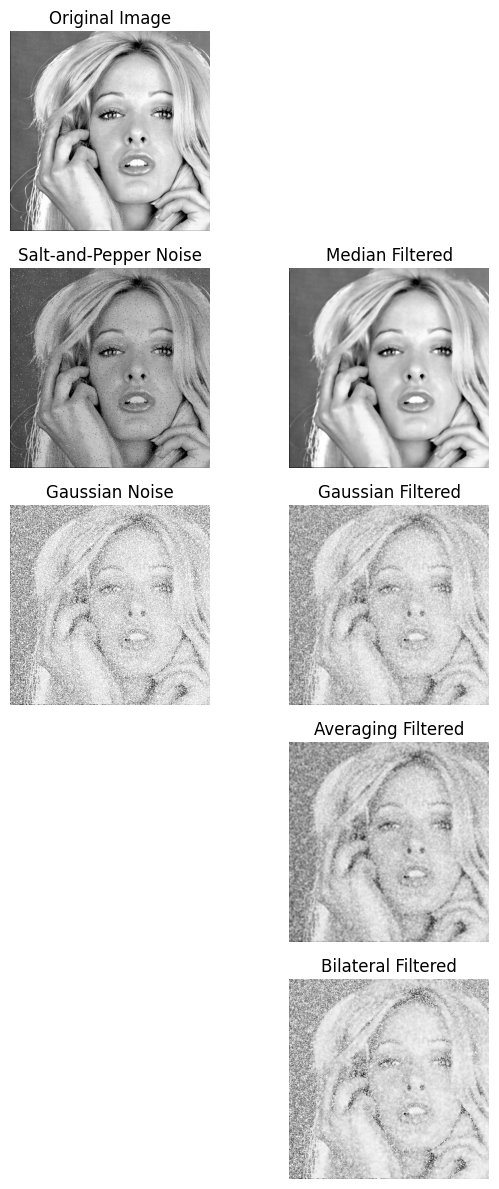

Processing: woman_darkhair.tif


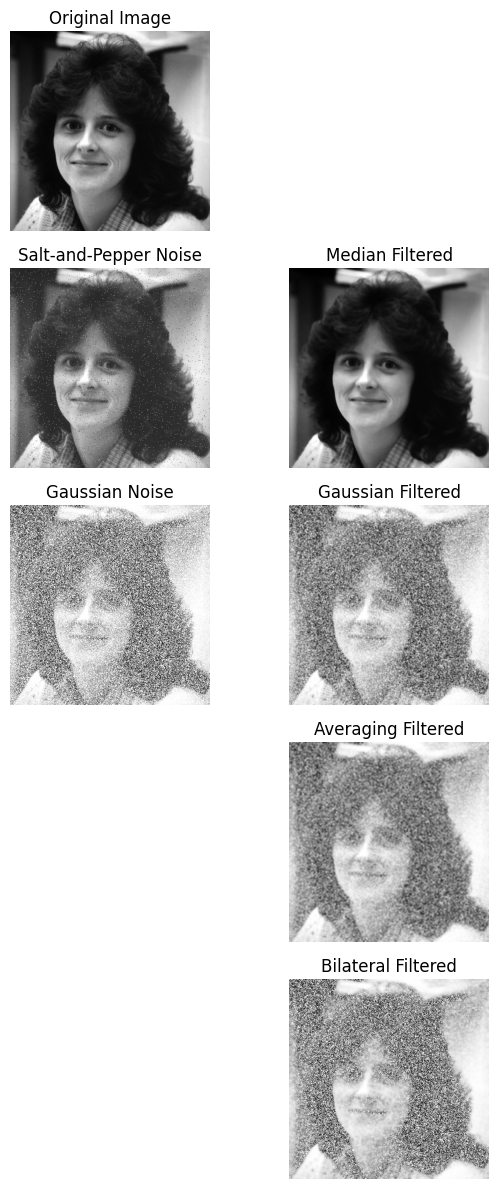

Processing complete. Processed images saved in: processed_images


In [140]:
def process_images(folder_path, output_folder):
    images = load_images_from_folder(folder_path)

    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    for filename, image in images:
        print(f"Processing: {filename}")

        # Add Noise
        gaussian_noisy = add_gaussian_noise(image)
        sp_noisy = add_salt_and_pepper_noise(image)

        # Apply Filters
        gaussian_filtered = apply_gaussian_filter(gaussian_noisy)
        averaging_filtered = apply_averaging_filter(gaussian_noisy)
        median_filtered = apply_median_filter(sp_noisy)
        bilateral_filtered = apply_bilateral_filter(gaussian_noisy)

        # Save Results
        cv2.imwrite(os.path.join(output_folder, f"{filename}_gaussian_noisy.png"), gaussian_noisy)
        cv2.imwrite(os.path.join(output_folder, f"{filename}_sp_noisy.png"), sp_noisy)
        cv2.imwrite(os.path.join(output_folder, f"{filename}_gaussian_filtered.png"), gaussian_filtered)
        cv2.imwrite(os.path.join(output_folder, f"{filename}_averaging_filtered.png"), averaging_filtered)
        cv2.imwrite(os.path.join(output_folder, f"{filename}_median_filtered.png"), median_filtered)
        cv2.imwrite(os.path.join(output_folder, f"{filename}_bilateral_filtered.png"), bilateral_filtered)

        # Display results for the current image
        row=5
        col=2
        
        plt.figure(figsize=(6, 12))
        plt.subplot(row, col, 1)
        plt.imshow(image, cmap='gray')
        plt.title("Original Image")
        plt.axis('off')
        
        plt.subplot(row, col, 3)
        plt.imshow(sp_noisy, cmap='gray')
        plt.title("Salt-and-Pepper Noise")
        plt.axis('off')

        plt.subplot(row, col, 4)
        plt.imshow(median_filtered, cmap='gray')
        plt.title("Median Filtered")
        plt.axis('off')

        plt.subplot(row, col, 5)
        plt.imshow(gaussian_noisy, cmap='gray')
        plt.title("Gaussian Noise")
        plt.axis('off')

        plt.subplot(row, col, 6)
        plt.imshow(gaussian_filtered, cmap='gray')
        plt.title("Gaussian Filtered")
        plt.axis('off')

        plt.subplot(row, col, 8)
        plt.imshow(averaging_filtered, cmap='gray')
        plt.title("Averaging Filtered")
        plt.axis('off')
        
        plt.subplot(row, col, 10)
        plt.imshow(bilateral_filtered, cmap='gray')
        plt.title("Bilateral Filtered")
        plt.axis('off')

        plt.tight_layout()
        plt.show()

# Define the folder paths
input_folder = "standard-test"  
output_folder = "processed_images"

process_images(input_folder, output_folder)
print(f"Processing complete. Processed images saved in: {output_folder}")

# Comments on the output

The Gaussian noise makes the image look grainy and uniformly noisy, as expected. This kind of noise is spread throughout the image and can blur finer details. When the Gaussian filter is applied, it effectively reduces this noise by smoothing the intensity variations. However, it also causes slight blurring of edges, as smoothing is uniform and doesn't distinguish between edges and flat areas.

The salt-pepper noise introduces random black and white pixels, like real-world interference. It's visually disruptive because the noise creates sharp contrasts. The median filter works effectively in removing this noise while preserving the edges well, which is visible in the output. This is because the median filter replaces pixel values based on the local median, avoiding the blurring effect seen in averaging filters.

The averaging filter smooths the Gaussian noise to some extent, but it also significantly blurs the edges and finer details of the image, which reduces clarity. This filter doesn't distinguish between noise and edges, leading to its limitations in practical scenarios.

Overall, the filters demonstrate their strengths and weaknesses clearly. Median filtering excels with salt-pepper noise, while Gaussian and bilateral filters handle Gaussian noise better. Bilateral filtering combines smoothing with edge preservation, making it a good all-around choice when preserving details is important. The outputs align well with what you'd expect from these filtering techniques.